In [ ]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
numSecRecorded = 150
fps = 20
numFrames2Read = 17805 # 15 mins. a little less than fps * numSecRecorded..

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
frameNxtBuff = [] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    frameNxtBuff.append(pixelValues[-20]) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "Main Buffers Ahead: ", pixelValues[-28], "\t",
          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  72 	 Main Timestamp:  72 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1 	 Interrupt Timestamp:  122 	 Main Timestamp:  122 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2 	 Interrupt Timestamp:  173 	 Main Timestamp:  173 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3 	 Interrupt Timestamp:  223 	 Main Timestamp:  223 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4 	 Interrupt Timestamp:  274 	 Main Timestamp:  274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5 	 Interrupt Timestamp:  324 	 Main Timestamp:  324 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6 	 Interrupt Timestamp:  375 	 Main Timestamp:  375 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7 	 Interrupt Timestamp:  425 	 Main Timestamp:  425 	 Main Buffers Ahead:  1 	 Interrupt Buffers 

Frame Number:  65 	 Interrupt Timestamp:  3351 	 Main Timestamp:  3351 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  66 	 Interrupt Timestamp:  3401 	 Main Timestamp:  3401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  67 	 Interrupt Timestamp:  3452 	 Main Timestamp:  3452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  68 	 Interrupt Timestamp:  3502 	 Main Timestamp:  3502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  69 	 Interrupt Timestamp:  3552 	 Main Timestamp:  3552 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  70 	 Interrupt Timestamp:  3603 	 Main Timestamp:  3603 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  71 	 Interrupt Timestamp:  3653 	 Main Timestamp:  3653 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  72 	 Interrupt Timestamp:  3704 	 Main Timestamp:  3704 	 Main Buffers Ahea

Frame Number:  128 	 Interrupt Timestamp:  6528 	 Main Timestamp:  6528 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  129 	 Interrupt Timestamp:  6579 	 Main Timestamp:  6579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  130 	 Interrupt Timestamp:  6629 	 Main Timestamp:  6629 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  131 	 Interrupt Timestamp:  6680 	 Main Timestamp:  6680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  132 	 Interrupt Timestamp:  6730 	 Main Timestamp:  6730 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  133 	 Interrupt Timestamp:  6781 	 Main Timestamp:  6781 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  134 	 Interrupt Timestamp:  6831 	 Main Timestamp:  6831 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  135 	 Interrupt Timestamp:  6882 	 Main Timestamp:  6882 	 Main Buff

Frame Number:  190 	 Interrupt Timestamp:  9656 	 Main Timestamp:  9656 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  191 	 Interrupt Timestamp:  9706 	 Main Timestamp:  9706 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  192 	 Interrupt Timestamp:  9757 	 Main Timestamp:  9757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  193 	 Interrupt Timestamp:  9807 	 Main Timestamp:  9807 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  194 	 Interrupt Timestamp:  9858 	 Main Timestamp:  9858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  195 	 Interrupt Timestamp:  9908 	 Main Timestamp:  9908 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  196 	 Interrupt Timestamp:  9958 	 Main Timestamp:  9958 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  197 	 Interrupt Timestamp:  10009 	 Main Timestamp:  10009 	 Main Bu

Frame Number:  254 	 Interrupt Timestamp:  12884 	 Main Timestamp:  12884 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  255 	 Interrupt Timestamp:  12934 	 Main Timestamp:  12934 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  256 	 Interrupt Timestamp:  12985 	 Main Timestamp:  12985 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  257 	 Interrupt Timestamp:  13035 	 Main Timestamp:  13035 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  258 	 Interrupt Timestamp:  13086 	 Main Timestamp:  13086 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  259 	 Interrupt Timestamp:  13136 	 Main Timestamp:  13136 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  260 	 Interrupt Timestamp:  13187 	 Main Timestamp:  13187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  261 	 Interrupt Timestamp:  13237 	 Main Timestamp:  1

Frame Number:  316 	 Interrupt Timestamp:  16011 	 Main Timestamp:  16011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  317 	 Interrupt Timestamp:  16062 	 Main Timestamp:  16062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  318 	 Interrupt Timestamp:  16112 	 Main Timestamp:  16112 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  319 	 Interrupt Timestamp:  16163 	 Main Timestamp:  16163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  320 	 Interrupt Timestamp:  16213 	 Main Timestamp:  16213 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  321 	 Interrupt Timestamp:  16264 	 Main Timestamp:  16264 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  322 	 Interrupt Timestamp:  16314 	 Main Timestamp:  16314 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  323 	 Interrupt Timestamp:  16364 	 Main Timestamp:  1

Frame Number:  380 	 Interrupt Timestamp:  19240 	 Main Timestamp:  19240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  381 	 Interrupt Timestamp:  19290 	 Main Timestamp:  19290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  382 	 Interrupt Timestamp:  19340 	 Main Timestamp:  19340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  383 	 Interrupt Timestamp:  19391 	 Main Timestamp:  19391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  384 	 Interrupt Timestamp:  19441 	 Main Timestamp:  19441 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  385 	 Interrupt Timestamp:  19492 	 Main Timestamp:  19492 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  386 	 Interrupt Timestamp:  19542 	 Main Timestamp:  19542 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  387 	 Interrupt Timestamp:  19593 	 Main Timestamp:  1

Frame Number:  446 	 Interrupt Timestamp:  22569 	 Main Timestamp:  22569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  447 	 Interrupt Timestamp:  22619 	 Main Timestamp:  22619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  448 	 Interrupt Timestamp:  22670 	 Main Timestamp:  22670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  449 	 Interrupt Timestamp:  22720 	 Main Timestamp:  22720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  450 	 Interrupt Timestamp:  22770 	 Main Timestamp:  22770 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  451 	 Interrupt Timestamp:  22821 	 Main Timestamp:  22821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  452 	 Interrupt Timestamp:  22871 	 Main Timestamp:  22871 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  453 	 Interrupt Timestamp:  22922 	 Main Timestamp:  2

Frame Number:  511 	 Interrupt Timestamp:  25847 	 Main Timestamp:  25847 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  512 	 Interrupt Timestamp:  25898 	 Main Timestamp:  25898 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  513 	 Interrupt Timestamp:  25948 	 Main Timestamp:  25948 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  514 	 Interrupt Timestamp:  25999 	 Main Timestamp:  25999 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  515 	 Interrupt Timestamp:  26049 	 Main Timestamp:  26049 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  516 	 Interrupt Timestamp:  26100 	 Main Timestamp:  26100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  517 	 Interrupt Timestamp:  26150 	 Main Timestamp:  26150 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  518 	 Interrupt Timestamp:  26200 	 Main Timestamp:  2

Frame Number:  573 	 Interrupt Timestamp:  28975 	 Main Timestamp:  28975 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  574 	 Interrupt Timestamp:  29025 	 Main Timestamp:  29025 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  575 	 Interrupt Timestamp:  29076 	 Main Timestamp:  29076 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  576 	 Interrupt Timestamp:  29126 	 Main Timestamp:  29126 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  577 	 Interrupt Timestamp:  29176 	 Main Timestamp:  29176 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  578 	 Interrupt Timestamp:  29227 	 Main Timestamp:  29227 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  579 	 Interrupt Timestamp:  29277 	 Main Timestamp:  29277 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  580 	 Interrupt Timestamp:  29328 	 Main Timestamp:  2

Frame Number:  639 	 Interrupt Timestamp:  32304 	 Main Timestamp:  32304 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  640 	 Interrupt Timestamp:  32354 	 Main Timestamp:  32354 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  641 	 Interrupt Timestamp:  32405 	 Main Timestamp:  32405 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  642 	 Interrupt Timestamp:  32455 	 Main Timestamp:  32455 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  643 	 Interrupt Timestamp:  32506 	 Main Timestamp:  32506 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  644 	 Interrupt Timestamp:  32556 	 Main Timestamp:  32556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  645 	 Interrupt Timestamp:  32606 	 Main Timestamp:  32606 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  646 	 Interrupt Timestamp:  32657 	 Main Timestamp:  3

Frame Number:  702 	 Interrupt Timestamp:  35482 	 Main Timestamp:  35482 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  703 	 Interrupt Timestamp:  35532 	 Main Timestamp:  35532 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  704 	 Interrupt Timestamp:  35582 	 Main Timestamp:  35583 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  705 	 Interrupt Timestamp:  35633 	 Main Timestamp:  35633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  706 	 Interrupt Timestamp:  35683 	 Main Timestamp:  35683 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  707 	 Interrupt Timestamp:  35734 	 Main Timestamp:  35734 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  708 	 Interrupt Timestamp:  35784 	 Main Timestamp:  35784 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  709 	 Interrupt Timestamp:  35835 	 Main Timestamp:  3

Frame Number:  767 	 Interrupt Timestamp:  38760 	 Main Timestamp:  38760 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  768 	 Interrupt Timestamp:  38811 	 Main Timestamp:  38811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  769 	 Interrupt Timestamp:  38861 	 Main Timestamp:  38861 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  770 	 Interrupt Timestamp:  38912 	 Main Timestamp:  38912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  771 	 Interrupt Timestamp:  38962 	 Main Timestamp:  38962 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  772 	 Interrupt Timestamp:  39012 	 Main Timestamp:  39012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  773 	 Interrupt Timestamp:  39063 	 Main Timestamp:  39063 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  774 	 Interrupt Timestamp:  39113 	 Main Timestamp:  3

Frame Number:  829 	 Interrupt Timestamp:  41888 	 Main Timestamp:  41888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  830 	 Interrupt Timestamp:  41938 	 Main Timestamp:  41938 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  831 	 Interrupt Timestamp:  41988 	 Main Timestamp:  41989 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  832 	 Interrupt Timestamp:  42039 	 Main Timestamp:  42039 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  833 	 Interrupt Timestamp:  42089 	 Main Timestamp:  42089 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  834 	 Interrupt Timestamp:  42140 	 Main Timestamp:  42140 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  835 	 Interrupt Timestamp:  42190 	 Main Timestamp:  42190 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  836 	 Interrupt Timestamp:  42241 	 Main Timestamp:  4

Frame Number:  892 	 Interrupt Timestamp:  45065 	 Main Timestamp:  45065 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  893 	 Interrupt Timestamp:  45116 	 Main Timestamp:  45116 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  894 	 Interrupt Timestamp:  45166 	 Main Timestamp:  45166 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  895 	 Interrupt Timestamp:  45217 	 Main Timestamp:  45217 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  896 	 Interrupt Timestamp:  45267 	 Main Timestamp:  45267 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  897 	 Interrupt Timestamp:  45318 	 Main Timestamp:  45318 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  898 	 Interrupt Timestamp:  45368 	 Main Timestamp:  45368 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  899 	 Interrupt Timestamp:  45418 	 Main Timestamp:  4

Frame Number:  959 	 Interrupt Timestamp:  48445 	 Main Timestamp:  48445 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  960 	 Interrupt Timestamp:  48495 	 Main Timestamp:  48495 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  961 	 Interrupt Timestamp:  48546 	 Main Timestamp:  48546 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  962 	 Interrupt Timestamp:  48596 	 Main Timestamp:  48596 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  963 	 Interrupt Timestamp:  48647 	 Main Timestamp:  48647 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  964 	 Interrupt Timestamp:  48697 	 Main Timestamp:  48697 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  965 	 Interrupt Timestamp:  48748 	 Main Timestamp:  48748 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  966 	 Interrupt Timestamp:  48798 	 Main Timestamp:  4

Frame Number:  1025 	 Interrupt Timestamp:  51774 	 Main Timestamp:  51774 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1026 	 Interrupt Timestamp:  51825 	 Main Timestamp:  51825 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1027 	 Interrupt Timestamp:  51875 	 Main Timestamp:  51875 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1028 	 Interrupt Timestamp:  51925 	 Main Timestamp:  51925 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1029 	 Interrupt Timestamp:  51976 	 Main Timestamp:  51976 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1030 	 Interrupt Timestamp:  52026 	 Main Timestamp:  52026 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1031 	 Interrupt Timestamp:  52077 	 Main Timestamp:  52077 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1032 	 Interrupt Timestamp:  52127 	 Main Times

Frame Number:  1087 	 Interrupt Timestamp:  54901 	 Main Timestamp:  54901 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1088 	 Interrupt Timestamp:  54952 	 Main Timestamp:  54952 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1089 	 Interrupt Timestamp:  55002 	 Main Timestamp:  55002 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1090 	 Interrupt Timestamp:  55053 	 Main Timestamp:  55053 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1091 	 Interrupt Timestamp:  55103 	 Main Timestamp:  55103 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1092 	 Interrupt Timestamp:  55154 	 Main Timestamp:  55154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1093 	 Interrupt Timestamp:  55204 	 Main Timestamp:  55204 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1094 	 Interrupt Timestamp:  55255 	 Main Times

Frame Number:  1149 	 Interrupt Timestamp:  58029 	 Main Timestamp:  58029 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1150 	 Interrupt Timestamp:  58079 	 Main Timestamp:  58079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1151 	 Interrupt Timestamp:  58130 	 Main Timestamp:  58130 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1152 	 Interrupt Timestamp:  58180 	 Main Timestamp:  58180 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1153 	 Interrupt Timestamp:  58231 	 Main Timestamp:  58231 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1154 	 Interrupt Timestamp:  58281 	 Main Timestamp:  58281 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1155 	 Interrupt Timestamp:  58331 	 Main Timestamp:  58331 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1156 	 Interrupt Timestamp:  58382 	 Main Times

Frame Number:  1212 	 Interrupt Timestamp:  61207 	 Main Timestamp:  61207 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1213 	 Interrupt Timestamp:  61257 	 Main Timestamp:  61257 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1214 	 Interrupt Timestamp:  61307 	 Main Timestamp:  61307 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1215 	 Interrupt Timestamp:  61358 	 Main Timestamp:  61358 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1216 	 Interrupt Timestamp:  61408 	 Main Timestamp:  61408 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1217 	 Interrupt Timestamp:  61459 	 Main Timestamp:  61459 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1218 	 Interrupt Timestamp:  61509 	 Main Timestamp:  61509 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1219 	 Interrupt Timestamp:  61560 	 Main Times

Frame Number:  1275 	 Interrupt Timestamp:  64384 	 Main Timestamp:  64384 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1276 	 Interrupt Timestamp:  64435 	 Main Timestamp:  64435 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1277 	 Interrupt Timestamp:  64485 	 Main Timestamp:  64485 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1278 	 Interrupt Timestamp:  64536 	 Main Timestamp:  64536 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1279 	 Interrupt Timestamp:  64586 	 Main Timestamp:  64586 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1280 	 Interrupt Timestamp:  64637 	 Main Timestamp:  64637 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1281 	 Interrupt Timestamp:  64687 	 Main Timestamp:  64687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1282 	 Interrupt Timestamp:  64737 	 Main Times

Frame Number:  1339 	 Interrupt Timestamp:  67613 	 Main Timestamp:  67613 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1340 	 Interrupt Timestamp:  67663 	 Main Timestamp:  67663 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1341 	 Interrupt Timestamp:  67713 	 Main Timestamp:  67713 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1342 	 Interrupt Timestamp:  67764 	 Main Timestamp:  67764 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1343 	 Interrupt Timestamp:  67814 	 Main Timestamp:  67814 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1344 	 Interrupt Timestamp:  67865 	 Main Timestamp:  67865 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1345 	 Interrupt Timestamp:  67915 	 Main Timestamp:  67915 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1346 	 Interrupt Timestamp:  67966 	 Main Times

Frame Number:  1401 	 Interrupt Timestamp:  70740 	 Main Timestamp:  70740 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1402 	 Interrupt Timestamp:  70790 	 Main Timestamp:  70790 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1403 	 Interrupt Timestamp:  70841 	 Main Timestamp:  70841 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1404 	 Interrupt Timestamp:  70891 	 Main Timestamp:  70891 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1405 	 Interrupt Timestamp:  70942 	 Main Timestamp:  70942 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1406 	 Interrupt Timestamp:  70992 	 Main Timestamp:  70992 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1407 	 Interrupt Timestamp:  71043 	 Main Timestamp:  71043 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1408 	 Interrupt Timestamp:  71093 	 Main Times

Frame Number:  1466 	 Interrupt Timestamp:  74019 	 Main Timestamp:  74019 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1467 	 Interrupt Timestamp:  74069 	 Main Timestamp:  74069 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1468 	 Interrupt Timestamp:  74119 	 Main Timestamp:  74119 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1469 	 Interrupt Timestamp:  74170 	 Main Timestamp:  74170 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1470 	 Interrupt Timestamp:  74220 	 Main Timestamp:  74220 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1471 	 Interrupt Timestamp:  74271 	 Main Timestamp:  74271 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1472 	 Interrupt Timestamp:  74321 	 Main Timestamp:  74321 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1473 	 Interrupt Timestamp:  74372 	 Main Times

Frame Number:  1528 	 Interrupt Timestamp:  77146 	 Main Timestamp:  77146 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1529 	 Interrupt Timestamp:  77196 	 Main Timestamp:  77196 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1530 	 Interrupt Timestamp:  77247 	 Main Timestamp:  77247 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1531 	 Interrupt Timestamp:  77297 	 Main Timestamp:  77297 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1532 	 Interrupt Timestamp:  77348 	 Main Timestamp:  77348 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1533 	 Interrupt Timestamp:  77398 	 Main Timestamp:  77398 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1534 	 Interrupt Timestamp:  77449 	 Main Timestamp:  77449 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1535 	 Interrupt Timestamp:  77499 	 Main Times

Frame Number:  1592 	 Interrupt Timestamp:  80374 	 Main Timestamp:  80374 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1593 	 Interrupt Timestamp:  80425 	 Main Timestamp:  80425 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1594 	 Interrupt Timestamp:  80475 	 Main Timestamp:  80475 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1595 	 Interrupt Timestamp:  80525 	 Main Timestamp:  80526 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1596 	 Interrupt Timestamp:  80576 	 Main Timestamp:  80576 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1597 	 Interrupt Timestamp:  80626 	 Main Timestamp:  80626 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1598 	 Interrupt Timestamp:  80677 	 Main Timestamp:  80677 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1599 	 Interrupt Timestamp:  80727 	 Main Times

Frame Number:  1657 	 Interrupt Timestamp:  83653 	 Main Timestamp:  83653 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1658 	 Interrupt Timestamp:  83703 	 Main Timestamp:  83703 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1659 	 Interrupt Timestamp:  83754 	 Main Timestamp:  83754 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1660 	 Interrupt Timestamp:  83804 	 Main Timestamp:  83804 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1661 	 Interrupt Timestamp:  83855 	 Main Timestamp:  83855 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1662 	 Interrupt Timestamp:  83905 	 Main Timestamp:  83905 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1663 	 Interrupt Timestamp:  83955 	 Main Timestamp:  83955 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1664 	 Interrupt Timestamp:  84006 	 Main Times

Frame Number:  1726 	 Interrupt Timestamp:  87133 	 Main Timestamp:  87133 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1727 	 Interrupt Timestamp:  87184 	 Main Timestamp:  87184 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1728 	 Interrupt Timestamp:  87234 	 Main Timestamp:  87234 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1729 	 Interrupt Timestamp:  87285 	 Main Timestamp:  87285 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1730 	 Interrupt Timestamp:  87335 	 Main Timestamp:  87335 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1731 	 Interrupt Timestamp:  87385 	 Main Timestamp:  87385 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1732 	 Interrupt Timestamp:  87436 	 Main Timestamp:  87436 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1733 	 Interrupt Timestamp:  87486 	 Main Times

Frame Number:  1790 	 Interrupt Timestamp:  90361 	 Main Timestamp:  90362 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1791 	 Interrupt Timestamp:  90412 	 Main Timestamp:  90412 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1792 	 Interrupt Timestamp:  90462 	 Main Timestamp:  90462 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1793 	 Interrupt Timestamp:  90513 	 Main Timestamp:  90513 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1794 	 Interrupt Timestamp:  90563 	 Main Timestamp:  90563 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1795 	 Interrupt Timestamp:  90614 	 Main Timestamp:  90614 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1796 	 Interrupt Timestamp:  90664 	 Main Timestamp:  90664 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1797 	 Interrupt Timestamp:  90715 	 Main Times

Frame Number:  1852 	 Interrupt Timestamp:  93489 	 Main Timestamp:  93489 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1853 	 Interrupt Timestamp:  93539 	 Main Timestamp:  93539 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1854 	 Interrupt Timestamp:  93590 	 Main Timestamp:  93590 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1855 	 Interrupt Timestamp:  93640 	 Main Timestamp:  93640 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1856 	 Interrupt Timestamp:  93691 	 Main Timestamp:  93691 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1857 	 Interrupt Timestamp:  93741 	 Main Timestamp:  93741 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1858 	 Interrupt Timestamp:  93791 	 Main Timestamp:  93792 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1859 	 Interrupt Timestamp:  93842 	 Main Times

Frame Number:  1920 	 Interrupt Timestamp:  96919 	 Main Timestamp:  96919 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1921 	 Interrupt Timestamp:  96969 	 Main Timestamp:  96969 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1922 	 Interrupt Timestamp:  97020 	 Main Timestamp:  97020 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1923 	 Interrupt Timestamp:  97070 	 Main Timestamp:  97070 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1924 	 Interrupt Timestamp:  97121 	 Main Timestamp:  97121 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1925 	 Interrupt Timestamp:  97171 	 Main Timestamp:  97171 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1926 	 Interrupt Timestamp:  97221 	 Main Timestamp:  97221 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1927 	 Interrupt Timestamp:  97272 	 Main Times

Frame Number:  1982 	 Interrupt Timestamp:  100046 	 Main Timestamp:  100046 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1983 	 Interrupt Timestamp:  100097 	 Main Timestamp:  100097 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1984 	 Interrupt Timestamp:  100147 	 Main Timestamp:  100147 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1985 	 Interrupt Timestamp:  100197 	 Main Timestamp:  100198 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1986 	 Interrupt Timestamp:  100248 	 Main Timestamp:  100248 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1987 	 Interrupt Timestamp:  100298 	 Main Timestamp:  100298 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1988 	 Interrupt Timestamp:  100349 	 Main Timestamp:  100349 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1989 	 Interrupt Timestamp:  1003

Frame Number:  2044 	 Interrupt Timestamp:  103174 	 Main Timestamp:  103174 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2045 	 Interrupt Timestamp:  103224 	 Main Timestamp:  103224 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2046 	 Interrupt Timestamp:  103274 	 Main Timestamp:  103274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2047 	 Interrupt Timestamp:  103325 	 Main Timestamp:  103325 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2048 	 Interrupt Timestamp:  103375 	 Main Timestamp:  103375 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2049 	 Interrupt Timestamp:  103426 	 Main Timestamp:  103426 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2050 	 Interrupt Timestamp:  103476 	 Main Timestamp:  103476 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2051 	 Interrupt Timestamp:  1035

Frame Number:  2108 	 Interrupt Timestamp:  106402 	 Main Timestamp:  106402 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2109 	 Interrupt Timestamp:  106452 	 Main Timestamp:  106452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2110 	 Interrupt Timestamp:  106503 	 Main Timestamp:  106503 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2111 	 Interrupt Timestamp:  106553 	 Main Timestamp:  106553 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2112 	 Interrupt Timestamp:  106604 	 Main Timestamp:  106604 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2113 	 Interrupt Timestamp:  106654 	 Main Timestamp:  106654 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2114 	 Interrupt Timestamp:  106704 	 Main Timestamp:  106704 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2115 	 Interrupt Timestamp:  1067

Frame Number:  2173 	 Interrupt Timestamp:  109680 	 Main Timestamp:  109680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2174 	 Interrupt Timestamp:  109731 	 Main Timestamp:  109731 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2175 	 Interrupt Timestamp:  109781 	 Main Timestamp:  109781 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2176 	 Interrupt Timestamp:  109832 	 Main Timestamp:  109832 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2177 	 Interrupt Timestamp:  109882 	 Main Timestamp:  109882 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2178 	 Interrupt Timestamp:  109933 	 Main Timestamp:  109933 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2179 	 Interrupt Timestamp:  109983 	 Main Timestamp:  109983 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2180 	 Interrupt Timestamp:  1100

Frame Number:  2237 	 Interrupt Timestamp:  112909 	 Main Timestamp:  112909 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2238 	 Interrupt Timestamp:  112959 	 Main Timestamp:  112959 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2239 	 Interrupt Timestamp:  113010 	 Main Timestamp:  113010 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2240 	 Interrupt Timestamp:  113060 	 Main Timestamp:  113060 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2241 	 Interrupt Timestamp:  113110 	 Main Timestamp:  113110 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2242 	 Interrupt Timestamp:  113161 	 Main Timestamp:  113161 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2243 	 Interrupt Timestamp:  113211 	 Main Timestamp:  113211 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2244 	 Interrupt Timestamp:  1132

Frame Number:  2302 	 Interrupt Timestamp:  116187 	 Main Timestamp:  116187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2303 	 Interrupt Timestamp:  116238 	 Main Timestamp:  116238 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2304 	 Interrupt Timestamp:  116288 	 Main Timestamp:  116288 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2305 	 Interrupt Timestamp:  116339 	 Main Timestamp:  116339 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2306 	 Interrupt Timestamp:  116389 	 Main Timestamp:  116389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2307 	 Interrupt Timestamp:  116440 	 Main Timestamp:  116440 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2308 	 Interrupt Timestamp:  116490 	 Main Timestamp:  116490 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2309 	 Interrupt Timestamp:  1165

Frame Number:  2366 	 Interrupt Timestamp:  119416 	 Main Timestamp:  119416 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2367 	 Interrupt Timestamp:  119466 	 Main Timestamp:  119466 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2368 	 Interrupt Timestamp:  119516 	 Main Timestamp:  119516 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2369 	 Interrupt Timestamp:  119567 	 Main Timestamp:  119567 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2370 	 Interrupt Timestamp:  119617 	 Main Timestamp:  119617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2371 	 Interrupt Timestamp:  119668 	 Main Timestamp:  119668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2372 	 Interrupt Timestamp:  119718 	 Main Timestamp:  119718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2373 	 Interrupt Timestamp:  1197

Frame Number:  2430 	 Interrupt Timestamp:  122644 	 Main Timestamp:  122644 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2431 	 Interrupt Timestamp:  122694 	 Main Timestamp:  122694 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2432 	 Interrupt Timestamp:  122745 	 Main Timestamp:  122745 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2433 	 Interrupt Timestamp:  122795 	 Main Timestamp:  122795 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2434 	 Interrupt Timestamp:  122846 	 Main Timestamp:  122846 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2435 	 Interrupt Timestamp:  122896 	 Main Timestamp:  122896 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2436 	 Interrupt Timestamp:  122946 	 Main Timestamp:  122946 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2437 	 Interrupt Timestamp:  1229

Frame Number:  2493 	 Interrupt Timestamp:  125822 	 Main Timestamp:  125822 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2494 	 Interrupt Timestamp:  125872 	 Main Timestamp:  125872 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2495 	 Interrupt Timestamp:  125922 	 Main Timestamp:  125922 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2496 	 Interrupt Timestamp:  125973 	 Main Timestamp:  125973 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2497 	 Interrupt Timestamp:  126023 	 Main Timestamp:  126023 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2498 	 Interrupt Timestamp:  126074 	 Main Timestamp:  126074 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2499 	 Interrupt Timestamp:  126124 	 Main Timestamp:  126124 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2500 	 Interrupt Timestamp:  1261

Frame Number:  2558 	 Interrupt Timestamp:  129100 	 Main Timestamp:  129100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2559 	 Interrupt Timestamp:  129151 	 Main Timestamp:  129151 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2560 	 Interrupt Timestamp:  129201 	 Main Timestamp:  129201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2561 	 Interrupt Timestamp:  129252 	 Main Timestamp:  129252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2562 	 Interrupt Timestamp:  129302 	 Main Timestamp:  129302 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2563 	 Interrupt Timestamp:  129352 	 Main Timestamp:  129352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2564 	 Interrupt Timestamp:  129403 	 Main Timestamp:  129403 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2565 	 Interrupt Timestamp:  1294

Frame Number:  2623 	 Interrupt Timestamp:  132379 	 Main Timestamp:  132379 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2624 	 Interrupt Timestamp:  132429 	 Main Timestamp:  132429 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2625 	 Interrupt Timestamp:  132480 	 Main Timestamp:  132480 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2626 	 Interrupt Timestamp:  132530 	 Main Timestamp:  132530 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2627 	 Interrupt Timestamp:  132581 	 Main Timestamp:  132581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2628 	 Interrupt Timestamp:  132631 	 Main Timestamp:  132631 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2629 	 Interrupt Timestamp:  132682 	 Main Timestamp:  132682 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2630 	 Interrupt Timestamp:  1327

Frame Number:  2687 	 Interrupt Timestamp:  135607 	 Main Timestamp:  135607 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2688 	 Interrupt Timestamp:  135658 	 Main Timestamp:  135658 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2689 	 Interrupt Timestamp:  135708 	 Main Timestamp:  135708 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2690 	 Interrupt Timestamp:  135758 	 Main Timestamp:  135758 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2691 	 Interrupt Timestamp:  135809 	 Main Timestamp:  135809 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2692 	 Interrupt Timestamp:  135859 	 Main Timestamp:  135859 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2693 	 Interrupt Timestamp:  135910 	 Main Timestamp:  135910 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2694 	 Interrupt Timestamp:  1359

Frame Number:  2749 	 Interrupt Timestamp:  138734 	 Main Timestamp:  138735 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2750 	 Interrupt Timestamp:  138785 	 Main Timestamp:  138785 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2751 	 Interrupt Timestamp:  138835 	 Main Timestamp:  138835 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2752 	 Interrupt Timestamp:  138886 	 Main Timestamp:  138886 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2753 	 Interrupt Timestamp:  138936 	 Main Timestamp:  138936 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2754 	 Interrupt Timestamp:  138987 	 Main Timestamp:  138987 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2755 	 Interrupt Timestamp:  139037 	 Main Timestamp:  139037 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2756 	 Interrupt Timestamp:  1390

Frame Number:  2814 	 Interrupt Timestamp:  142013 	 Main Timestamp:  142013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2815 	 Interrupt Timestamp:  142064 	 Main Timestamp:  142064 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2816 	 Interrupt Timestamp:  142114 	 Main Timestamp:  142114 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2817 	 Interrupt Timestamp:  142164 	 Main Timestamp:  142164 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2818 	 Interrupt Timestamp:  142215 	 Main Timestamp:  142215 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2819 	 Interrupt Timestamp:  142265 	 Main Timestamp:  142265 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2820 	 Interrupt Timestamp:  142316 	 Main Timestamp:  142316 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2821 	 Interrupt Timestamp:  1423

Frame Number:  2880 	 Interrupt Timestamp:  145342 	 Main Timestamp:  145342 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2881 	 Interrupt Timestamp:  145393 	 Main Timestamp:  145393 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2882 	 Interrupt Timestamp:  145443 	 Main Timestamp:  145443 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2883 	 Interrupt Timestamp:  145494 	 Main Timestamp:  145494 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2884 	 Interrupt Timestamp:  145544 	 Main Timestamp:  145544 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2885 	 Interrupt Timestamp:  145594 	 Main Timestamp:  145594 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2886 	 Interrupt Timestamp:  145645 	 Main Timestamp:  145645 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2887 	 Interrupt Timestamp:  1456

Frame Number:  2947 	 Interrupt Timestamp:  148722 	 Main Timestamp:  148722 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2948 	 Interrupt Timestamp:  148772 	 Main Timestamp:  148772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2949 	 Interrupt Timestamp:  148823 	 Main Timestamp:  148823 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2950 	 Interrupt Timestamp:  148873 	 Main Timestamp:  148873 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2951 	 Interrupt Timestamp:  148924 	 Main Timestamp:  148924 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2952 	 Interrupt Timestamp:  148974 	 Main Timestamp:  148974 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2953 	 Interrupt Timestamp:  149024 	 Main Timestamp:  149024 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2954 	 Interrupt Timestamp:  1490

Frame Number:  3015 	 Interrupt Timestamp:  152152 	 Main Timestamp:  152152 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3016 	 Interrupt Timestamp:  152202 	 Main Timestamp:  152202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3017 	 Interrupt Timestamp:  152253 	 Main Timestamp:  152253 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3018 	 Interrupt Timestamp:  152303 	 Main Timestamp:  152303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3019 	 Interrupt Timestamp:  152354 	 Main Timestamp:  152354 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3020 	 Interrupt Timestamp:  152404 	 Main Timestamp:  152404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3021 	 Interrupt Timestamp:  152454 	 Main Timestamp:  152454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3022 	 Interrupt Timestamp:  1525

Frame Number:  3076 	 Interrupt Timestamp:  155229 	 Main Timestamp:  155229 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3077 	 Interrupt Timestamp:  155279 	 Main Timestamp:  155279 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3078 	 Interrupt Timestamp:  155330 	 Main Timestamp:  155330 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3079 	 Interrupt Timestamp:  155380 	 Main Timestamp:  155380 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3080 	 Interrupt Timestamp:  155430 	 Main Timestamp:  155431 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3081 	 Interrupt Timestamp:  155481 	 Main Timestamp:  155481 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3082 	 Interrupt Timestamp:  155531 	 Main Timestamp:  155531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3083 	 Interrupt Timestamp:  1555

Frame Number:  3140 	 Interrupt Timestamp:  158457 	 Main Timestamp:  158457 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3141 	 Interrupt Timestamp:  158507 	 Main Timestamp:  158507 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3142 	 Interrupt Timestamp:  158558 	 Main Timestamp:  158558 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3143 	 Interrupt Timestamp:  158608 	 Main Timestamp:  158608 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3144 	 Interrupt Timestamp:  158659 	 Main Timestamp:  158659 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3145 	 Interrupt Timestamp:  158709 	 Main Timestamp:  158709 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3146 	 Interrupt Timestamp:  158760 	 Main Timestamp:  158760 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3147 	 Interrupt Timestamp:  1588

Frame Number:  3203 	 Interrupt Timestamp:  161635 	 Main Timestamp:  161635 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3204 	 Interrupt Timestamp:  161685 	 Main Timestamp:  161685 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3205 	 Interrupt Timestamp:  161736 	 Main Timestamp:  161736 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3206 	 Interrupt Timestamp:  161786 	 Main Timestamp:  161786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3207 	 Interrupt Timestamp:  161836 	 Main Timestamp:  161837 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3208 	 Interrupt Timestamp:  161887 	 Main Timestamp:  161887 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3209 	 Interrupt Timestamp:  161937 	 Main Timestamp:  161937 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3210 	 Interrupt Timestamp:  1619

Frame Number:  3266 	 Interrupt Timestamp:  164813 	 Main Timestamp:  164813 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3267 	 Interrupt Timestamp:  164863 	 Main Timestamp:  164863 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3268 	 Interrupt Timestamp:  164913 	 Main Timestamp:  164913 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3269 	 Interrupt Timestamp:  164964 	 Main Timestamp:  164964 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3270 	 Interrupt Timestamp:  165014 	 Main Timestamp:  165014 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3271 	 Interrupt Timestamp:  165065 	 Main Timestamp:  165065 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3272 	 Interrupt Timestamp:  165115 	 Main Timestamp:  165115 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3273 	 Interrupt Timestamp:  1651

Frame Number:  3329 	 Interrupt Timestamp:  167990 	 Main Timestamp:  167990 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3330 	 Interrupt Timestamp:  168041 	 Main Timestamp:  168041 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3331 	 Interrupt Timestamp:  168091 	 Main Timestamp:  168091 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3332 	 Interrupt Timestamp:  168142 	 Main Timestamp:  168142 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3333 	 Interrupt Timestamp:  168192 	 Main Timestamp:  168192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3334 	 Interrupt Timestamp:  168243 	 Main Timestamp:  168243 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3335 	 Interrupt Timestamp:  168293 	 Main Timestamp:  168293 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3336 	 Interrupt Timestamp:  1683

Frame Number:  3390 	 Interrupt Timestamp:  171067 	 Main Timestamp:  171067 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3391 	 Interrupt Timestamp:  171118 	 Main Timestamp:  171118 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3392 	 Interrupt Timestamp:  171168 	 Main Timestamp:  171168 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3393 	 Interrupt Timestamp:  171219 	 Main Timestamp:  171219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3394 	 Interrupt Timestamp:  171269 	 Main Timestamp:  171269 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3395 	 Interrupt Timestamp:  171319 	 Main Timestamp:  171319 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3396 	 Interrupt Timestamp:  171370 	 Main Timestamp:  171370 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3397 	 Interrupt Timestamp:  1714

Frame Number:  3457 	 Interrupt Timestamp:  174447 	 Main Timestamp:  174447 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3458 	 Interrupt Timestamp:  174497 	 Main Timestamp:  174497 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3459 	 Interrupt Timestamp:  174548 	 Main Timestamp:  174548 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3460 	 Interrupt Timestamp:  174598 	 Main Timestamp:  174598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3461 	 Interrupt Timestamp:  174649 	 Main Timestamp:  174649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3462 	 Interrupt Timestamp:  174699 	 Main Timestamp:  174699 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3463 	 Interrupt Timestamp:  174749 	 Main Timestamp:  174749 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3464 	 Interrupt Timestamp:  1748

Frame Number:  3523 	 Interrupt Timestamp:  177776 	 Main Timestamp:  177776 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3524 	 Interrupt Timestamp:  177826 	 Main Timestamp:  177826 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3525 	 Interrupt Timestamp:  177877 	 Main Timestamp:  177877 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3526 	 Interrupt Timestamp:  177927 	 Main Timestamp:  177927 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3527 	 Interrupt Timestamp:  177978 	 Main Timestamp:  177978 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3528 	 Interrupt Timestamp:  178028 	 Main Timestamp:  178028 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3529 	 Interrupt Timestamp:  178079 	 Main Timestamp:  178079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3530 	 Interrupt Timestamp:  1781

Frame Number:  3590 	 Interrupt Timestamp:  181155 	 Main Timestamp:  181155 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3591 	 Interrupt Timestamp:  181206 	 Main Timestamp:  181206 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3592 	 Interrupt Timestamp:  181256 	 Main Timestamp:  181256 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3593 	 Interrupt Timestamp:  181307 	 Main Timestamp:  181307 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3594 	 Interrupt Timestamp:  181357 	 Main Timestamp:  181357 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3595 	 Interrupt Timestamp:  181408 	 Main Timestamp:  181408 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3596 	 Interrupt Timestamp:  181458 	 Main Timestamp:  181458 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3597 	 Interrupt Timestamp:  1815

Frame Number:  3650 	 Interrupt Timestamp:  184182 	 Main Timestamp:  184182 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3651 	 Interrupt Timestamp:  184232 	 Main Timestamp:  184232 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3652 	 Interrupt Timestamp:  184283 	 Main Timestamp:  184283 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3653 	 Interrupt Timestamp:  184333 	 Main Timestamp:  184333 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3654 	 Interrupt Timestamp:  184384 	 Main Timestamp:  184384 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3655 	 Interrupt Timestamp:  184434 	 Main Timestamp:  184434 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3656 	 Interrupt Timestamp:  184485 	 Main Timestamp:  184485 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3657 	 Interrupt Timestamp:  1845

Frame Number:  3712 	 Interrupt Timestamp:  187309 	 Main Timestamp:  187309 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3713 	 Interrupt Timestamp:  187360 	 Main Timestamp:  187360 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3714 	 Interrupt Timestamp:  187410 	 Main Timestamp:  187410 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3715 	 Interrupt Timestamp:  187461 	 Main Timestamp:  187461 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3716 	 Interrupt Timestamp:  187511 	 Main Timestamp:  187511 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3717 	 Interrupt Timestamp:  187561 	 Main Timestamp:  187561 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3718 	 Interrupt Timestamp:  187612 	 Main Timestamp:  187612 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3719 	 Interrupt Timestamp:  1876

Frame Number:  3777 	 Interrupt Timestamp:  190588 	 Main Timestamp:  190588 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3778 	 Interrupt Timestamp:  190638 	 Main Timestamp:  190638 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3779 	 Interrupt Timestamp:  190689 	 Main Timestamp:  190689 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3780 	 Interrupt Timestamp:  190739 	 Main Timestamp:  190739 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3781 	 Interrupt Timestamp:  190790 	 Main Timestamp:  190790 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3782 	 Interrupt Timestamp:  190840 	 Main Timestamp:  190840 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3783 	 Interrupt Timestamp:  190891 	 Main Timestamp:  190891 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3784 	 Interrupt Timestamp:  1909

Frame Number:  3838 	 Interrupt Timestamp:  193665 	 Main Timestamp:  193665 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3839 	 Interrupt Timestamp:  193715 	 Main Timestamp:  193715 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3840 	 Interrupt Timestamp:  193766 	 Main Timestamp:  193766 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3841 	 Interrupt Timestamp:  193816 	 Main Timestamp:  193816 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3842 	 Interrupt Timestamp:  193867 	 Main Timestamp:  193867 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3843 	 Interrupt Timestamp:  193917 	 Main Timestamp:  193917 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3844 	 Interrupt Timestamp:  193967 	 Main Timestamp:  193967 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3845 	 Interrupt Timestamp:  1940

Frame Number:  3902 	 Interrupt Timestamp:  196893 	 Main Timestamp:  196893 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3903 	 Interrupt Timestamp:  196943 	 Main Timestamp:  196944 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3904 	 Interrupt Timestamp:  196994 	 Main Timestamp:  196994 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3905 	 Interrupt Timestamp:  197044 	 Main Timestamp:  197044 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3906 	 Interrupt Timestamp:  197095 	 Main Timestamp:  197095 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3907 	 Interrupt Timestamp:  197145 	 Main Timestamp:  197145 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3908 	 Interrupt Timestamp:  197196 	 Main Timestamp:  197196 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3909 	 Interrupt Timestamp:  1972

Frame Number:  3964 	 Interrupt Timestamp:  200020 	 Main Timestamp:  200020 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3965 	 Interrupt Timestamp:  200071 	 Main Timestamp:  200071 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3966 	 Interrupt Timestamp:  200121 	 Main Timestamp:  200121 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3967 	 Interrupt Timestamp:  200172 	 Main Timestamp:  200172 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3968 	 Interrupt Timestamp:  200222 	 Main Timestamp:  200222 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3969 	 Interrupt Timestamp:  200273 	 Main Timestamp:  200273 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3970 	 Interrupt Timestamp:  200323 	 Main Timestamp:  200323 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3971 	 Interrupt Timestamp:  2003

Frame Number:  4030 	 Interrupt Timestamp:  203350 	 Main Timestamp:  203350 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4031 	 Interrupt Timestamp:  203400 	 Main Timestamp:  203400 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4032 	 Interrupt Timestamp:  203450 	 Main Timestamp:  203450 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4033 	 Interrupt Timestamp:  203501 	 Main Timestamp:  203501 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4034 	 Interrupt Timestamp:  203551 	 Main Timestamp:  203551 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4035 	 Interrupt Timestamp:  203602 	 Main Timestamp:  203602 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4036 	 Interrupt Timestamp:  203652 	 Main Timestamp:  203652 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4037 	 Interrupt Timestamp:  2037

Frame Number:  4093 	 Interrupt Timestamp:  206527 	 Main Timestamp:  206527 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4094 	 Interrupt Timestamp:  206578 	 Main Timestamp:  206578 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4095 	 Interrupt Timestamp:  206628 	 Main Timestamp:  206628 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4096 	 Interrupt Timestamp:  206679 	 Main Timestamp:  206679 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4097 	 Interrupt Timestamp:  206729 	 Main Timestamp:  206729 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4098 	 Interrupt Timestamp:  206779 	 Main Timestamp:  206780 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4099 	 Interrupt Timestamp:  206830 	 Main Timestamp:  206830 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4100 	 Interrupt Timestamp:  2068

Frame Number:  4160 	 Interrupt Timestamp:  209907 	 Main Timestamp:  209907 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4161 	 Interrupt Timestamp:  209957 	 Main Timestamp:  209957 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4162 	 Interrupt Timestamp:  210008 	 Main Timestamp:  210008 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4163 	 Interrupt Timestamp:  210058 	 Main Timestamp:  210058 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4164 	 Interrupt Timestamp:  210109 	 Main Timestamp:  210109 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4165 	 Interrupt Timestamp:  210159 	 Main Timestamp:  210159 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4166 	 Interrupt Timestamp:  210209 	 Main Timestamp:  210210 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4167 	 Interrupt Timestamp:  2102

Frame Number:  4225 	 Interrupt Timestamp:  213186 	 Main Timestamp:  213186 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4226 	 Interrupt Timestamp:  213236 	 Main Timestamp:  213236 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4227 	 Interrupt Timestamp:  213286 	 Main Timestamp:  213286 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4228 	 Interrupt Timestamp:  213337 	 Main Timestamp:  213337 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4229 	 Interrupt Timestamp:  213387 	 Main Timestamp:  213387 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4230 	 Interrupt Timestamp:  213438 	 Main Timestamp:  213438 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4231 	 Interrupt Timestamp:  213488 	 Main Timestamp:  213488 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4232 	 Interrupt Timestamp:  2135

Frame Number:  4289 	 Interrupt Timestamp:  216414 	 Main Timestamp:  216414 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4290 	 Interrupt Timestamp:  216464 	 Main Timestamp:  216464 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4291 	 Interrupt Timestamp:  216515 	 Main Timestamp:  216515 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4292 	 Interrupt Timestamp:  216565 	 Main Timestamp:  216565 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4293 	 Interrupt Timestamp:  216616 	 Main Timestamp:  216616 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4294 	 Interrupt Timestamp:  216666 	 Main Timestamp:  216666 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4295 	 Interrupt Timestamp:  216716 	 Main Timestamp:  216716 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4296 	 Interrupt Timestamp:  2167

Frame Number:  4350 	 Interrupt Timestamp:  219491 	 Main Timestamp:  219491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4351 	 Interrupt Timestamp:  219541 	 Main Timestamp:  219541 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4352 	 Interrupt Timestamp:  219592 	 Main Timestamp:  219592 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4353 	 Interrupt Timestamp:  219642 	 Main Timestamp:  219642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4354 	 Interrupt Timestamp:  219692 	 Main Timestamp:  219692 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4355 	 Interrupt Timestamp:  219743 	 Main Timestamp:  219743 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4356 	 Interrupt Timestamp:  219793 	 Main Timestamp:  219793 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4357 	 Interrupt Timestamp:  2198

Frame Number:  4411 	 Interrupt Timestamp:  222568 	 Main Timestamp:  222568 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4412 	 Interrupt Timestamp:  222618 	 Main Timestamp:  222618 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4413 	 Interrupt Timestamp:  222668 	 Main Timestamp:  222668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4414 	 Interrupt Timestamp:  222719 	 Main Timestamp:  222719 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4415 	 Interrupt Timestamp:  222769 	 Main Timestamp:  222769 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4416 	 Interrupt Timestamp:  222820 	 Main Timestamp:  222820 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4417 	 Interrupt Timestamp:  222870 	 Main Timestamp:  222870 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4418 	 Interrupt Timestamp:  2229

Frame Number:  4476 	 Interrupt Timestamp:  225846 	 Main Timestamp:  225846 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4477 	 Interrupt Timestamp:  225897 	 Main Timestamp:  225897 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4478 	 Interrupt Timestamp:  225947 	 Main Timestamp:  225947 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4479 	 Interrupt Timestamp:  225998 	 Main Timestamp:  225998 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4480 	 Interrupt Timestamp:  226048 	 Main Timestamp:  226048 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4481 	 Interrupt Timestamp:  226098 	 Main Timestamp:  226098 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4482 	 Interrupt Timestamp:  226149 	 Main Timestamp:  226149 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4483 	 Interrupt Timestamp:  2261

Frame Number:  4537 	 Interrupt Timestamp:  228923 	 Main Timestamp:  228923 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4538 	 Interrupt Timestamp:  228974 	 Main Timestamp:  228974 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4539 	 Interrupt Timestamp:  229024 	 Main Timestamp:  229024 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4540 	 Interrupt Timestamp:  229074 	 Main Timestamp:  229074 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4541 	 Interrupt Timestamp:  229125 	 Main Timestamp:  229125 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4542 	 Interrupt Timestamp:  229175 	 Main Timestamp:  229175 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4543 	 Interrupt Timestamp:  229226 	 Main Timestamp:  229226 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4544 	 Interrupt Timestamp:  2292

Frame Number:  4600 	 Interrupt Timestamp:  232101 	 Main Timestamp:  232101 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4601 	 Interrupt Timestamp:  232151 	 Main Timestamp:  232151 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4602 	 Interrupt Timestamp:  232202 	 Main Timestamp:  232202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4603 	 Interrupt Timestamp:  232252 	 Main Timestamp:  232252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4604 	 Interrupt Timestamp:  232303 	 Main Timestamp:  232303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4605 	 Interrupt Timestamp:  232353 	 Main Timestamp:  232353 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4606 	 Interrupt Timestamp:  232404 	 Main Timestamp:  232404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4607 	 Interrupt Timestamp:  2324

Frame Number:  4667 	 Interrupt Timestamp:  235480 	 Main Timestamp:  235480 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4668 	 Interrupt Timestamp:  235531 	 Main Timestamp:  235531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4669 	 Interrupt Timestamp:  235581 	 Main Timestamp:  235581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4670 	 Interrupt Timestamp:  235632 	 Main Timestamp:  235632 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4671 	 Interrupt Timestamp:  235682 	 Main Timestamp:  235682 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4672 	 Interrupt Timestamp:  235733 	 Main Timestamp:  235733 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4673 	 Interrupt Timestamp:  235783 	 Main Timestamp:  235783 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4674 	 Interrupt Timestamp:  2358

Frame Number:  4732 	 Interrupt Timestamp:  238759 	 Main Timestamp:  238759 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4733 	 Interrupt Timestamp:  238810 	 Main Timestamp:  238810 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4734 	 Interrupt Timestamp:  238860 	 Main Timestamp:  238860 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4735 	 Interrupt Timestamp:  238910 	 Main Timestamp:  238910 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4736 	 Interrupt Timestamp:  238961 	 Main Timestamp:  238961 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4737 	 Interrupt Timestamp:  239011 	 Main Timestamp:  239011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4738 	 Interrupt Timestamp:  239062 	 Main Timestamp:  239062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4739 	 Interrupt Timestamp:  2391

Frame Number:  4795 	 Interrupt Timestamp:  241937 	 Main Timestamp:  241937 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4796 	 Interrupt Timestamp:  241987 	 Main Timestamp:  241987 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4797 	 Interrupt Timestamp:  242038 	 Main Timestamp:  242038 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4798 	 Interrupt Timestamp:  242088 	 Main Timestamp:  242088 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4799 	 Interrupt Timestamp:  242139 	 Main Timestamp:  242139 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4800 	 Interrupt Timestamp:  242189 	 Main Timestamp:  242189 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4801 	 Interrupt Timestamp:  242240 	 Main Timestamp:  242240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4802 	 Interrupt Timestamp:  2422

Frame Number:  4859 	 Interrupt Timestamp:  245165 	 Main Timestamp:  245165 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4860 	 Interrupt Timestamp:  245216 	 Main Timestamp:  245216 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4861 	 Interrupt Timestamp:  245266 	 Main Timestamp:  245266 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4862 	 Interrupt Timestamp:  245316 	 Main Timestamp:  245317 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4863 	 Interrupt Timestamp:  245367 	 Main Timestamp:  245367 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4864 	 Interrupt Timestamp:  245417 	 Main Timestamp:  245417 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4865 	 Interrupt Timestamp:  245468 	 Main Timestamp:  245468 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4866 	 Interrupt Timestamp:  2455

Frame Number:  4919 	 Interrupt Timestamp:  248192 	 Main Timestamp:  248192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4920 	 Interrupt Timestamp:  248242 	 Main Timestamp:  248242 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4921 	 Interrupt Timestamp:  248293 	 Main Timestamp:  248293 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4922 	 Interrupt Timestamp:  248343 	 Main Timestamp:  248343 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4923 	 Interrupt Timestamp:  248393 	 Main Timestamp:  248393 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4924 	 Interrupt Timestamp:  248444 	 Main Timestamp:  248444 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4925 	 Interrupt Timestamp:  248494 	 Main Timestamp:  248494 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4926 	 Interrupt Timestamp:  2485

Frame Number:  4984 	 Interrupt Timestamp:  251470 	 Main Timestamp:  251470 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4985 	 Interrupt Timestamp:  251521 	 Main Timestamp:  251521 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4986 	 Interrupt Timestamp:  251571 	 Main Timestamp:  251571 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4987 	 Interrupt Timestamp:  251622 	 Main Timestamp:  251622 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4988 	 Interrupt Timestamp:  251672 	 Main Timestamp:  251672 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4989 	 Interrupt Timestamp:  251722 	 Main Timestamp:  251723 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4990 	 Interrupt Timestamp:  251773 	 Main Timestamp:  251773 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4991 	 Interrupt Timestamp:  2518

Frame Number:  5047 	 Interrupt Timestamp:  254648 	 Main Timestamp:  254648 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5048 	 Interrupt Timestamp:  254699 	 Main Timestamp:  254699 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5049 	 Interrupt Timestamp:  254749 	 Main Timestamp:  254749 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5050 	 Interrupt Timestamp:  254799 	 Main Timestamp:  254799 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5051 	 Interrupt Timestamp:  254850 	 Main Timestamp:  254850 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5052 	 Interrupt Timestamp:  254900 	 Main Timestamp:  254900 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5053 	 Interrupt Timestamp:  254951 	 Main Timestamp:  254951 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5054 	 Interrupt Timestamp:  2550

Frame Number:  5113 	 Interrupt Timestamp:  257977 	 Main Timestamp:  257977 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5114 	 Interrupt Timestamp:  258028 	 Main Timestamp:  258028 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5115 	 Interrupt Timestamp:  258078 	 Main Timestamp:  258078 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5116 	 Interrupt Timestamp:  258129 	 Main Timestamp:  258129 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5117 	 Interrupt Timestamp:  258179 	 Main Timestamp:  258179 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5118 	 Interrupt Timestamp:  258229 	 Main Timestamp:  258229 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5119 	 Interrupt Timestamp:  258280 	 Main Timestamp:  258280 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5120 	 Interrupt Timestamp:  2583

Frame Number:  5179 	 Interrupt Timestamp:  261306 	 Main Timestamp:  261306 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5180 	 Interrupt Timestamp:  261357 	 Main Timestamp:  261357 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5181 	 Interrupt Timestamp:  261407 	 Main Timestamp:  261407 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5182 	 Interrupt Timestamp:  261458 	 Main Timestamp:  261458 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5183 	 Interrupt Timestamp:  261508 	 Main Timestamp:  261508 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5184 	 Interrupt Timestamp:  261559 	 Main Timestamp:  261559 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5185 	 Interrupt Timestamp:  261609 	 Main Timestamp:  261609 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5186 	 Interrupt Timestamp:  2616

Frame Number:  5240 	 Interrupt Timestamp:  264383 	 Main Timestamp:  264383 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5241 	 Interrupt Timestamp:  264434 	 Main Timestamp:  264434 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5242 	 Interrupt Timestamp:  264484 	 Main Timestamp:  264484 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5243 	 Interrupt Timestamp:  264535 	 Main Timestamp:  264535 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5244 	 Interrupt Timestamp:  264585 	 Main Timestamp:  264585 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5245 	 Interrupt Timestamp:  264635 	 Main Timestamp:  264635 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5246 	 Interrupt Timestamp:  264686 	 Main Timestamp:  264686 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5247 	 Interrupt Timestamp:  2647

Frame Number:  5303 	 Interrupt Timestamp:  267561 	 Main Timestamp:  267561 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5304 	 Interrupt Timestamp:  267611 	 Main Timestamp:  267611 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5305 	 Interrupt Timestamp:  267662 	 Main Timestamp:  267662 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5306 	 Interrupt Timestamp:  267712 	 Main Timestamp:  267712 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5307 	 Interrupt Timestamp:  267763 	 Main Timestamp:  267763 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5308 	 Interrupt Timestamp:  267813 	 Main Timestamp:  267813 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5309 	 Interrupt Timestamp:  267864 	 Main Timestamp:  267864 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5310 	 Interrupt Timestamp:  2679

Frame Number:  5367 	 Interrupt Timestamp:  270789 	 Main Timestamp:  270789 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5368 	 Interrupt Timestamp:  270840 	 Main Timestamp:  270840 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5369 	 Interrupt Timestamp:  270890 	 Main Timestamp:  270890 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5370 	 Interrupt Timestamp:  270941 	 Main Timestamp:  270941 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5371 	 Interrupt Timestamp:  270991 	 Main Timestamp:  270991 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5372 	 Interrupt Timestamp:  271041 	 Main Timestamp:  271041 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5373 	 Interrupt Timestamp:  271092 	 Main Timestamp:  271092 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5374 	 Interrupt Timestamp:  2711

Frame Number:  5430 	 Interrupt Timestamp:  273967 	 Main Timestamp:  273967 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5431 	 Interrupt Timestamp:  274017 	 Main Timestamp:  274017 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5432 	 Interrupt Timestamp:  274068 	 Main Timestamp:  274068 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5433 	 Interrupt Timestamp:  274118 	 Main Timestamp:  274118 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5434 	 Interrupt Timestamp:  274169 	 Main Timestamp:  274169 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5435 	 Interrupt Timestamp:  274219 	 Main Timestamp:  274219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5436 	 Interrupt Timestamp:  274270 	 Main Timestamp:  274270 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5437 	 Interrupt Timestamp:  2743

Frame Number:  5499 	 Interrupt Timestamp:  277447 	 Main Timestamp:  277447 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5500 	 Interrupt Timestamp:  277498 	 Main Timestamp:  277498 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5501 	 Interrupt Timestamp:  277548 	 Main Timestamp:  277548 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5502 	 Interrupt Timestamp:  277599 	 Main Timestamp:  277599 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5503 	 Interrupt Timestamp:  277649 	 Main Timestamp:  277649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5504 	 Interrupt Timestamp:  277700 	 Main Timestamp:  277700 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5505 	 Interrupt Timestamp:  277750 	 Main Timestamp:  277750 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5506 	 Interrupt Timestamp:  2778

Frame Number:  5560 	 Interrupt Timestamp:  280524 	 Main Timestamp:  280524 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5561 	 Interrupt Timestamp:  280575 	 Main Timestamp:  280575 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5562 	 Interrupt Timestamp:  280625 	 Main Timestamp:  280625 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5563 	 Interrupt Timestamp:  280676 	 Main Timestamp:  280676 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5564 	 Interrupt Timestamp:  280726 	 Main Timestamp:  280726 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5565 	 Interrupt Timestamp:  280777 	 Main Timestamp:  280777 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5566 	 Interrupt Timestamp:  280827 	 Main Timestamp:  280827 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5567 	 Interrupt Timestamp:  2808

Frame Number:  5628 	 Interrupt Timestamp:  283954 	 Main Timestamp:  283954 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5629 	 Interrupt Timestamp:  284005 	 Main Timestamp:  284005 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5630 	 Interrupt Timestamp:  284055 	 Main Timestamp:  284055 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5631 	 Interrupt Timestamp:  284106 	 Main Timestamp:  284106 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5632 	 Interrupt Timestamp:  284156 	 Main Timestamp:  284156 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5633 	 Interrupt Timestamp:  284207 	 Main Timestamp:  284207 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5634 	 Interrupt Timestamp:  284257 	 Main Timestamp:  284257 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5635 	 Interrupt Timestamp:  2843

Frame Number:  5697 	 Interrupt Timestamp:  287435 	 Main Timestamp:  287435 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5698 	 Interrupt Timestamp:  287485 	 Main Timestamp:  287485 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5699 	 Interrupt Timestamp:  287536 	 Main Timestamp:  287536 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5700 	 Interrupt Timestamp:  287586 	 Main Timestamp:  287586 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5701 	 Interrupt Timestamp:  287637 	 Main Timestamp:  287637 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5702 	 Interrupt Timestamp:  287687 	 Main Timestamp:  287687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5703 	 Interrupt Timestamp:  287737 	 Main Timestamp:  287737 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5704 	 Interrupt Timestamp:  2877

Frame Number:  5760 	 Interrupt Timestamp:  290613 	 Main Timestamp:  290613 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5761 	 Interrupt Timestamp:  290663 	 Main Timestamp:  290663 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5762 	 Interrupt Timestamp:  290713 	 Main Timestamp:  290713 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5763 	 Interrupt Timestamp:  290764 	 Main Timestamp:  290764 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5764 	 Interrupt Timestamp:  290814 	 Main Timestamp:  290814 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5765 	 Interrupt Timestamp:  290865 	 Main Timestamp:  290865 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5766 	 Interrupt Timestamp:  290915 	 Main Timestamp:  290915 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5767 	 Interrupt Timestamp:  2909

Frame Number:  5822 	 Interrupt Timestamp:  293740 	 Main Timestamp:  293740 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5823 	 Interrupt Timestamp:  293790 	 Main Timestamp:  293790 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5824 	 Interrupt Timestamp:  293841 	 Main Timestamp:  293841 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5825 	 Interrupt Timestamp:  293891 	 Main Timestamp:  293891 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5826 	 Interrupt Timestamp:  293942 	 Main Timestamp:  293942 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5827 	 Interrupt Timestamp:  293992 	 Main Timestamp:  293992 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5828 	 Interrupt Timestamp:  294043 	 Main Timestamp:  294043 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5829 	 Interrupt Timestamp:  2940

Frame Number:  5890 	 Interrupt Timestamp:  297170 	 Main Timestamp:  297170 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5891 	 Interrupt Timestamp:  297220 	 Main Timestamp:  297220 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5892 	 Interrupt Timestamp:  297271 	 Main Timestamp:  297271 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5893 	 Interrupt Timestamp:  297321 	 Main Timestamp:  297321 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5894 	 Interrupt Timestamp:  297372 	 Main Timestamp:  297372 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5895 	 Interrupt Timestamp:  297422 	 Main Timestamp:  297422 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5896 	 Interrupt Timestamp:  297473 	 Main Timestamp:  297473 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5897 	 Interrupt Timestamp:  2975

Frame Number:  5954 	 Interrupt Timestamp:  300398 	 Main Timestamp:  300398 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5955 	 Interrupt Timestamp:  300449 	 Main Timestamp:  300449 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5956 	 Interrupt Timestamp:  300499 	 Main Timestamp:  300499 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5957 	 Interrupt Timestamp:  300549 	 Main Timestamp:  300549 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5958 	 Interrupt Timestamp:  300600 	 Main Timestamp:  300600 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5959 	 Interrupt Timestamp:  300650 	 Main Timestamp:  300650 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5960 	 Interrupt Timestamp:  300701 	 Main Timestamp:  300701 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5961 	 Interrupt Timestamp:  3007

Frame Number:  6017 	 Interrupt Timestamp:  303576 	 Main Timestamp:  303576 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6018 	 Interrupt Timestamp:  303626 	 Main Timestamp:  303626 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6019 	 Interrupt Timestamp:  303677 	 Main Timestamp:  303677 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6020 	 Interrupt Timestamp:  303727 	 Main Timestamp:  303727 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6021 	 Interrupt Timestamp:  303778 	 Main Timestamp:  303778 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6022 	 Interrupt Timestamp:  303828 	 Main Timestamp:  303828 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6023 	 Interrupt Timestamp:  303879 	 Main Timestamp:  303879 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6024 	 Interrupt Timestamp:  3039

Frame Number:  6081 	 Interrupt Timestamp:  306804 	 Main Timestamp:  306804 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6082 	 Interrupt Timestamp:  306855 	 Main Timestamp:  306855 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6083 	 Interrupt Timestamp:  306905 	 Main Timestamp:  306905 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6084 	 Interrupt Timestamp:  306955 	 Main Timestamp:  306956 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6085 	 Interrupt Timestamp:  307006 	 Main Timestamp:  307006 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6086 	 Interrupt Timestamp:  307056 	 Main Timestamp:  307056 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6087 	 Interrupt Timestamp:  307107 	 Main Timestamp:  307107 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6088 	 Interrupt Timestamp:  3071

Frame Number:  6145 	 Interrupt Timestamp:  310032 	 Main Timestamp:  310032 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6146 	 Interrupt Timestamp:  310083 	 Main Timestamp:  310083 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6147 	 Interrupt Timestamp:  310133 	 Main Timestamp:  310133 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6148 	 Interrupt Timestamp:  310184 	 Main Timestamp:  310184 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6149 	 Interrupt Timestamp:  310234 	 Main Timestamp:  310234 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6150 	 Interrupt Timestamp:  310285 	 Main Timestamp:  310285 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6151 	 Interrupt Timestamp:  310335 	 Main Timestamp:  310335 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6152 	 Interrupt Timestamp:  3103

Frame Number:  6208 	 Interrupt Timestamp:  313210 	 Main Timestamp:  313210 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6209 	 Interrupt Timestamp:  313261 	 Main Timestamp:  313261 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6210 	 Interrupt Timestamp:  313311 	 Main Timestamp:  313311 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6211 	 Interrupt Timestamp:  313361 	 Main Timestamp:  313362 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6212 	 Interrupt Timestamp:  313412 	 Main Timestamp:  313412 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6213 	 Interrupt Timestamp:  313462 	 Main Timestamp:  313462 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6214 	 Interrupt Timestamp:  313513 	 Main Timestamp:  313513 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6215 	 Interrupt Timestamp:  3135

Frame Number:  6274 	 Interrupt Timestamp:  316539 	 Main Timestamp:  316539 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6275 	 Interrupt Timestamp:  316590 	 Main Timestamp:  316590 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6276 	 Interrupt Timestamp:  316640 	 Main Timestamp:  316640 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6277 	 Interrupt Timestamp:  316691 	 Main Timestamp:  316691 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6278 	 Interrupt Timestamp:  316741 	 Main Timestamp:  316741 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6279 	 Interrupt Timestamp:  316791 	 Main Timestamp:  316792 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6280 	 Interrupt Timestamp:  316842 	 Main Timestamp:  316842 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6281 	 Interrupt Timestamp:  3168

Frame Number:  6337 	 Interrupt Timestamp:  319717 	 Main Timestamp:  319717 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6338 	 Interrupt Timestamp:  319768 	 Main Timestamp:  319768 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6339 	 Interrupt Timestamp:  319818 	 Main Timestamp:  319818 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6340 	 Interrupt Timestamp:  319868 	 Main Timestamp:  319868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6341 	 Interrupt Timestamp:  319919 	 Main Timestamp:  319919 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6342 	 Interrupt Timestamp:  319969 	 Main Timestamp:  319969 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6343 	 Interrupt Timestamp:  320020 	 Main Timestamp:  320020 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6344 	 Interrupt Timestamp:  3200

Frame Number:  6402 	 Interrupt Timestamp:  322996 	 Main Timestamp:  322996 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6403 	 Interrupt Timestamp:  323046 	 Main Timestamp:  323046 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6404 	 Interrupt Timestamp:  323097 	 Main Timestamp:  323097 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6405 	 Interrupt Timestamp:  323147 	 Main Timestamp:  323147 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6406 	 Interrupt Timestamp:  323198 	 Main Timestamp:  323198 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6407 	 Interrupt Timestamp:  323248 	 Main Timestamp:  323248 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6408 	 Interrupt Timestamp:  323298 	 Main Timestamp:  323298 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6409 	 Interrupt Timestamp:  3233

Frame Number:  6468 	 Interrupt Timestamp:  326325 	 Main Timestamp:  326325 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6469 	 Interrupt Timestamp:  326375 	 Main Timestamp:  326375 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6470 	 Interrupt Timestamp:  326426 	 Main Timestamp:  326426 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6471 	 Interrupt Timestamp:  326476 	 Main Timestamp:  326476 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6472 	 Interrupt Timestamp:  326527 	 Main Timestamp:  326527 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6473 	 Interrupt Timestamp:  326577 	 Main Timestamp:  326577 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6474 	 Interrupt Timestamp:  326627 	 Main Timestamp:  326628 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6475 	 Interrupt Timestamp:  3266

In [186]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

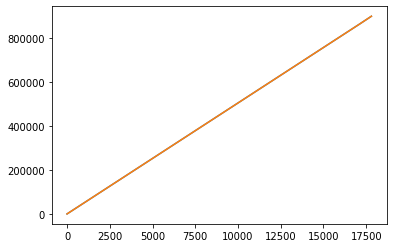

In [187]:
# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [188]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

(array([1.0000e+00, 1.7802e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

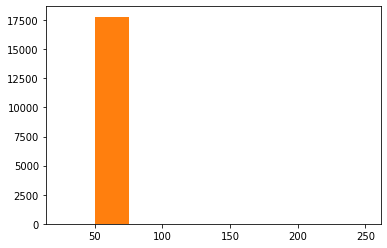

In [189]:
# Histogram of interframe lengths

import matplotlib.pyplot as plt

#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


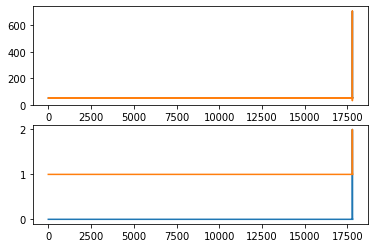

In [190]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


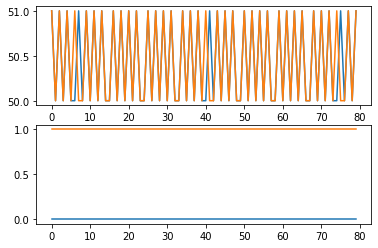

In [191]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

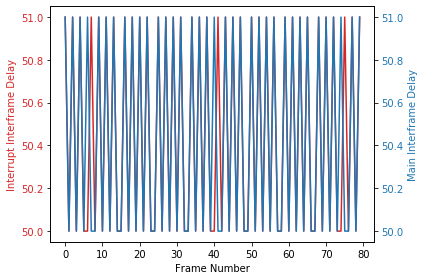

In [192]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [197]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[ 50  51 708  31  68  50  51  50  51  50  51  50  50  51  50  51  50  51
  50  51] 
 [51, 51, 51, 51, 51, 51, 51, 51, 51, 706]


In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [122]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

2858 1 1 1 0
2858 296 296
2858 1 0


In [136]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

[18, 33, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,

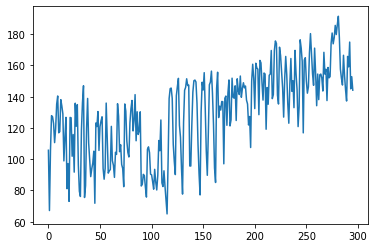

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

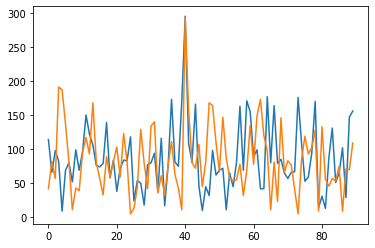

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

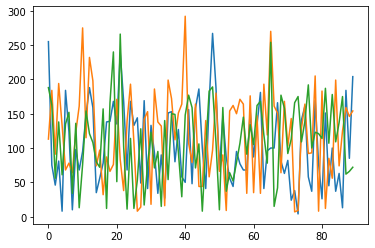

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()